In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from utils.dataset_load import path as dataset_path

First we need to import the dataset.


In [178]:
data_raw = pd.read_csv(dataset_path + "\data\creditcard_csv.csv")

strip_then_int = lambda s: int(s.replace("'", ""))

data_raw['Class'] = data_raw['Class'].apply(strip_then_int)

data_raw.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [179]:
## Preprocessing the data

from sklearn.preprocessing import StandardScaler

data_raw['Amount'] = StandardScaler().fit_transform(data_raw[['Amount']])
# data_raw['Time'] = StandardScaler().fit_transform(data_raw[['Time']])

data_raw = data_raw.drop(['Time', 'Amount'], axis=1)

X = data_raw.iloc[:, :-1]
y = data_raw.iloc[:, -1]

Split the dataset to 80:20 ratio of train and test datasets

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

**Visualization**

We will visualize the whole data set as opposed to just the X_train or just X_test (this will give us better insight to the whole data not just the training set)

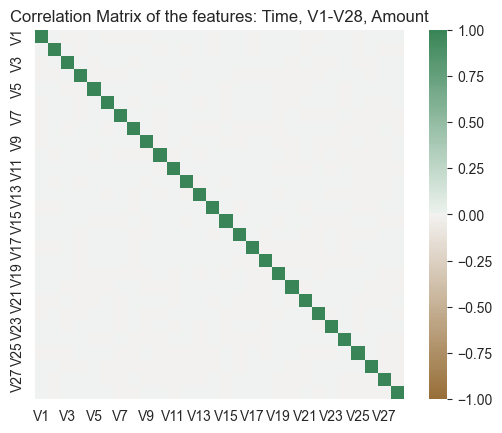

In [181]:
corr_matrix = data_raw.iloc[:, :-1].corr()      ## without the 'Class' column

axis_corr = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    square=True
)

plt.title("Correlation Matrix of the features: Time, V1-V28, Amount")
plt.show()

Seems like the features: 'Time' and 'Amount' have correlation with the features V1-V28,
all the other features don't have correlation between them

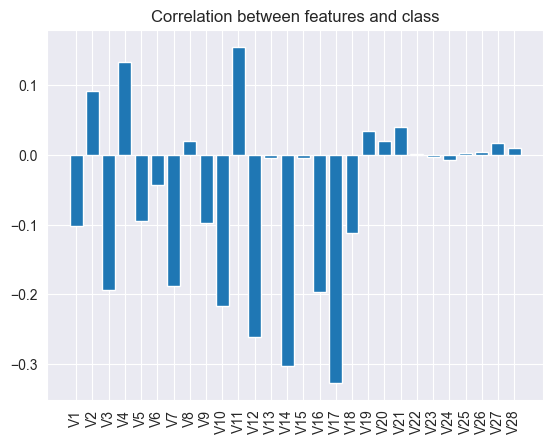

In [182]:
corr_matrix_with_target = data_raw.corrwith(data_raw["Class"]).drop('Class') ## drop 'Class' because corr is 1

plt.bar(corr_matrix_with_target.index, corr_matrix_with_target)
plt.xticks(rotation=90)
plt.title("Correlation between features and class")
plt.show()

|**Applying Naive Bayes**
- The most simple algorithm and has high interoperability
- Naive Bayes assumes independence between features (That's why it's 'Naive')
- Bernoulli assumes binary features (might binarize if not binary already)

In [183]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

bnb = BernoulliNB()

In [184]:
## util functions

def print_report(y_true, y_pred):
    """
    This function prints the classification report.
    :param y_true:
    :param y_pred:
    :return:
    """
    print(classification_report(y_true, y_pred))

    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True)

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    plt.show()

def print_roc(y_true, y_probs):
    """
    This function prints the ROC curve & prints the ROC AUC score to the console.
    :param y_true:
    :param y_probs:
    :return:
    """
    # print(f"AUC-ROC Score: {roc_auc_score(y_test, y_probs)}")

    # Plotting the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Now we will evaluate the prediction, we will use precision & recall as the main metric because the dataset is highly imbalanced

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.62      0.70       148

    accuracy                           1.00     85443
   macro avg       0.90      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



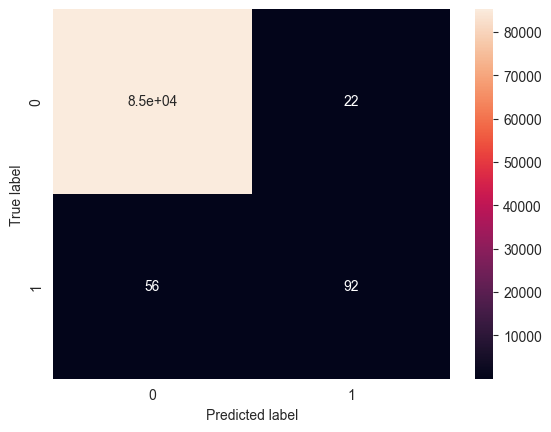

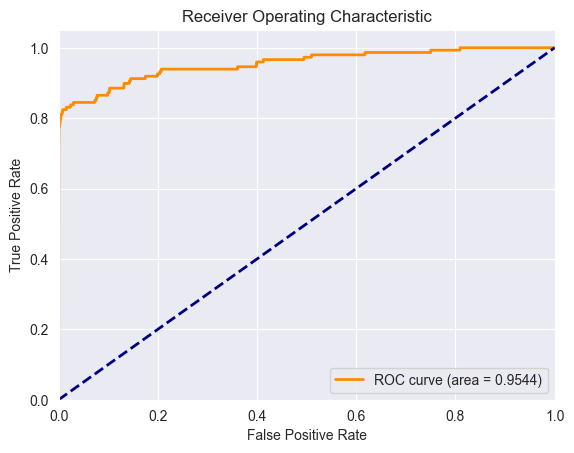

In [185]:
y_pred = bnb.fit(X_train, y_train).predict(X_test)
y_probs = bnb.predict_proba(X_test)[:, 1]

print_report(y_test, y_pred)
print_roc(y_test, y_probs)

**Results**
- Accuracy is very high - BUT it doesn't tell us whether the model is good or not because the dataset is so unbalanced
- Precision & Recall -

**Train a Logistic Regression Model:**
Now we will train a Logistic Regression model using our resampled training data. We use class_weight='balanced' to handle class imbalance, ensuring the model pays more attention to fraud cases.


In [186]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [187]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_res, y_res)

LogisticRegression(class_weight='balanced', max_iter=1000)

**Make Predictions on the Test Set:**
Next, we use the trained model to predict fraud on the test data. We also obtain probability scores for each prediction, which are useful for visualizing ROC and precision-recall curves.

In [188]:
# Predict class labels
y_pred = lr.predict(X_test)
# Predict probability scores (for evaluation curves)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

**Evaluate Model Performance (Scores and Reports):**
Let's check how well our model performs. We print the classification report, ROC AUC score, and the confusion matrix to understand its strengths and weaknesses.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.92      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



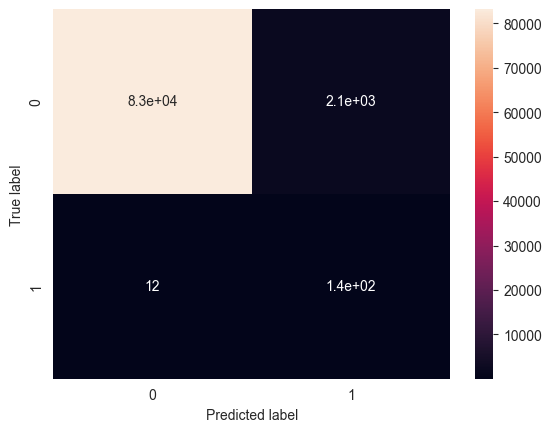

In [189]:
# Print performance metrics
print_report(y_test, y_pred)

**Visualize the Results:**
Finally, let's visualize the model's performance using the ROC curve and the Precision-Recall curve. These plots help us understand the trade-off between correctly detecting fraud and avoiding false alarms.


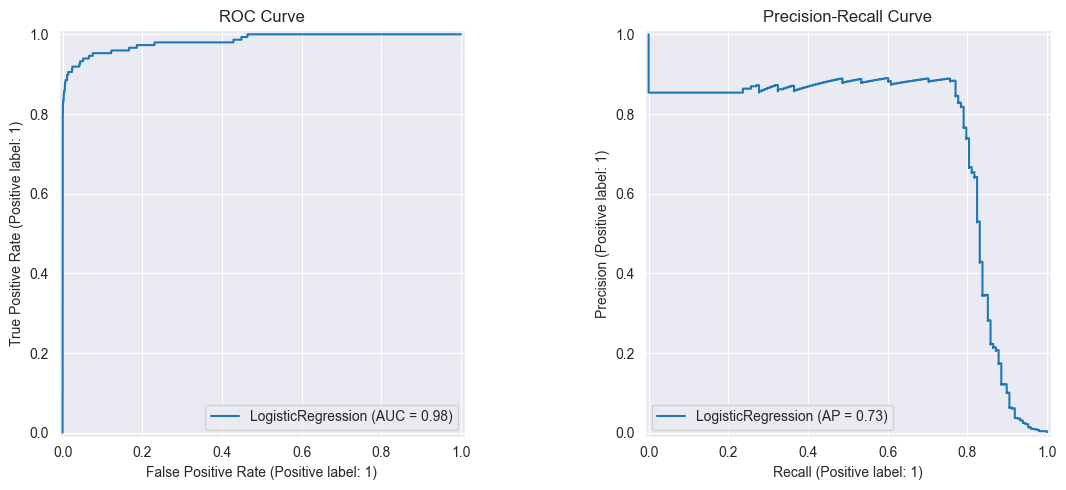

In [190]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC Curve
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=axes[0])
axes[0].set_title('ROC Curve')

# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(lr, X_test, y_test, ax=axes[1])
axes[1].set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

In [191]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier

import warnings

In [199]:
# class_labels = np.unique(y_train)
# weights = compute_class_weight('balanced', classes=class_labels, y=y_train)

neg, pos = np.bincount(y)
scale_pos_weight = neg / pos


ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_jobs=-1,
                                      n_estimators=500,
                                      criterion='entropy',
                                      class_weight='balanced',
                                      max_features='sqrt',)),

        ('lr', LogisticRegression(class_weight='balanced',
                                  n_jobs=-1,
                                  max_iter=1000)),

        ('xgb', XGBClassifier(scale_pos_weight=scale_pos_weight,
                              n_jobs=-1,
                              n_estimators=500,
                              use_label_encoder=True,
                              eval_metric='logloss')),
    ],
    voting='soft',
)

# warnings.filterwarnings('ignore')

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.83      0.85       148

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



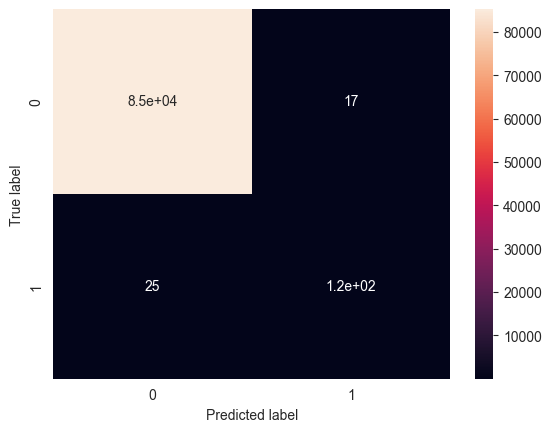

In [200]:
print_report(y_test, y_pred)

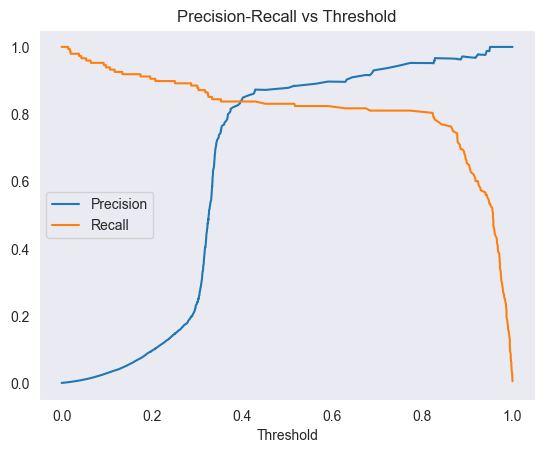

In [196]:
|plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.grid()
plt.show()